### Pacotes usados

# Análise e Coleta de Dados de Cafeína do Gean Gobo
#### **Objetivo:** Coletar dados de cada vez que o Gean Gobo toma café por dia, onde anotarei a hora de cada café, o tipo de café e cia. 

- Analisar a quantidade de caféina consumida por dia, semana, mês, e fazer inferências para anos. 
- Estou tomando uma quantidade saudável de cafeína ? 

In [2]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import openpyxl

In [12]:
# Acessando a fonte de dados

df = pd.read_csv('cafes.csv')
df

,id,data,horario
0,1,30/09/2024,8:10
1,2,30/09/2024,10:00
2,3,01/10/2024,9:40
3,4,01/10/2024,9:57
4,5,01/10/2024,11:02
5,6,02/10/2024,8:46
6,7,02/10/2024,10:00
7,8,01/10/2024,20:15
8,9,02/10/2024,12:05
9,10,02/10/2024,16:54


### Criando a estrutura do CSV com seu primeiro dado

In [2]:
import pandas as pd

# Nome do arquivo CSV
filename = 'cafes.csv'

# Criação do DataFrame com o primeiro dado
data = {
    'id': [1],  # ID auto-incrementado manualmente no início
    'data': ['30/09/2024'],
    'horario': ['08:10']
}

# Converte para DataFrame
df = pd.DataFrame(data)

# Salva o DataFrame em um arquivo CSV
df.to_csv(filename, index=False)

print(f"Arquivo {filename} criado com sucesso!")


Arquivo cafes.csv criado com sucesso!


### Atualização do CSV
- A cada vez que tomar café, atualizar o CSV

In [3]:
filename = 'cafes.csv'

# Verifica se o arquivo já existe
if os.path.exists(filename):
    # Se existir, carrega o CSV existente
    df = pd.read_csv(filename)
    # Define o próximo ID com base no último valor
    next_id = df['id'].max() + 1
else:
    # Se o arquivo não existir, cria um DataFrame vazio e começa o ID em 1
    df = pd.DataFrame(columns=['id', 'data', 'horario'])
    next_id = 1

# Solicita entrada do usuário para data e horário
data = input("Digite a data no formato dia/mes/ano (ex: 30/09/2024): ")
horario = input("Digite o horário no formato HH:MM (ex: 08:10): ")

# Cria um novo DataFrame com o novo dado
novo_dado = pd.DataFrame({
    'id': [next_id],
    'data': [data],
    'horario': [horario]
})

# Adiciona o novo dado ao DataFrame existente
df = pd.concat([df, novo_dado], ignore_index=True)

# Salva o DataFrame atualizado no arquivo CSV
df.to_csv(filename, index=False)

print(f"Novo dado adicionado com sucesso! O arquivo {filename} foi atualizado.")

Novo dado adicionado com sucesso! O arquivo cafes.csv foi atualizado.


### Séries Temporais de Café

### Caso seja preciso modificar algum dado na tabela

In [6]:
# Arrumando formatação de horário:
df['data'].replace('03/04/2024', '03/10/2024', inplace=True)
df

C:\Users\User\AppData\Local\Temp\ipykernel_15412\2993033185.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['data'].replace('03/04/2024', '03/10/2024', inplace=True)


,id,data,horario,datetime
0,1,30/09/2024,08:10,2024-09-30 08:10:00
1,2,30/09/2024,10:00,2024-09-30 10:00:00
2,3,01/10/2024,9:40,2024-10-01 09:40:00
3,4,01/10/2024,09:57,2024-10-01 09:57:00
4,5,01/10/2024,11:02,2024-10-01 11:02:00
5,6,02/10/2024,08:46,2024-10-02 08:46:00
6,7,02/10/2024,10:00,2024-10-02 10:00:00
7,8,01/10/2024,20:15,2024-10-01 20:15:00
8,9,02/10/2024,12:05,2024-10-02 12:05:00
9,10,02/10/2024,16:54,2024-10-02 16:54:00


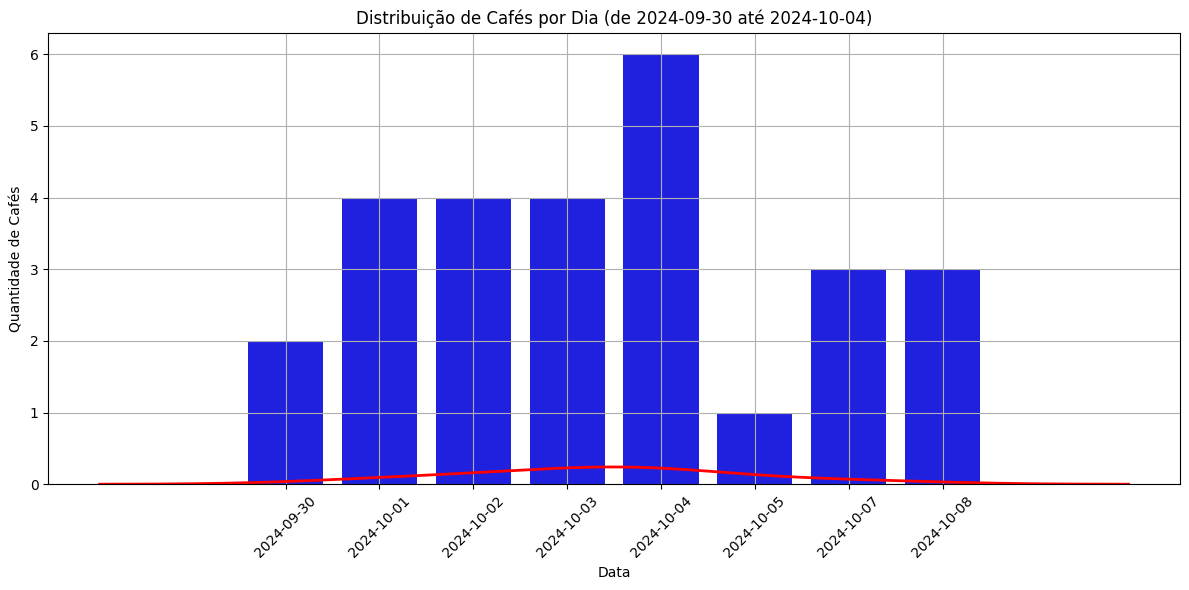

In [4]:
import seaborn as sns

# Converte a coluna 'data' para o formato de data e cria uma nova coluna de datetime com data e hora
df['datetime'] = pd.to_datetime(df['data'] + ' ' + df['horario'], format='%d/%m/%Y %H:%M')

# Define o intervalo de datas (de 30/09/2024 até 31/12/2024)
start_date = pd.to_datetime('30/09/2024', format='%d/%m/%Y')
end_date = pd.to_datetime('31/12/2024', format='%d/%m/%Y')

# Filtra os dados dentro do intervalo de datas
df_filtrado = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Cria uma coluna separada para o dia
df_filtrado['day'] = df_filtrado['datetime'].dt.date

# Conta a quantidade de cafés por dia
cafes_por_dia = df_filtrado.groupby('day').size().reset_index(name='cafe_count')

# Cria o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='day', y='cafe_count', data=cafes_por_dia, color='b')

# Sobrepõe o gráfico de KDE (densidade de kernel) dos dados de cafés
sns.kdeplot(cafes_por_dia['cafe_count'], color='r', linewidth=2)

# Configurações do gráfico
#plt.title(f'Distribuição de Cafés por Dia (de {start_date.date()} até {end_date.date()})')
plt.title(f'Distribuição de Cafés por Dia (de {start_date.date()} até 2024-10-04)')

plt.xlabel('Data')
plt.ylabel('Quantidade de Cafés')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(True)

# Exibe o gráfico
plt.tight_layout()
plt.show()

In [20]:
df

,id,data,horario,datetime
0,1,30/09/2024,8:10,2024-09-30 08:10:00
1,2,30/09/2024,10:00,2024-09-30 10:00:00
2,3,01/10/2024,9:40,2024-10-01 09:40:00
3,4,01/10/2024,9:57,2024-10-01 09:57:00
4,5,01/10/2024,11:02,2024-10-01 11:02:00
5,6,02/10/2024,8:46,2024-10-02 08:46:00
6,7,02/10/2024,10:00,2024-10-02 10:00:00
7,8,01/10/2024,20:15,2024-10-01 20:15:00
8,9,02/10/2024,12:05,2024-10-02 12:05:00
9,10,02/10/2024,16:54,2024-10-02 16:54:00
